# Perform EDA for this given Dataset.

In [212]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [213]:
# Reading the Dataset
dataset = pd.read_csv("drug200.csv")

In [214]:
# Dataset
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [215]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [216]:
dataset.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


# Plot Distribution curve for Age along with histogram.

In [217]:
# Age
Age = dataset["Age"]
Age

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

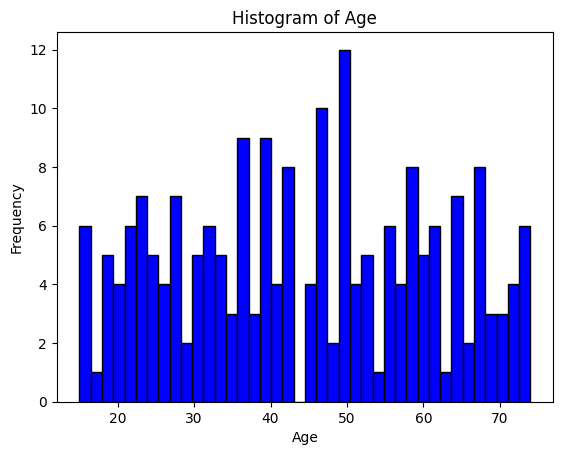

In [218]:
# Histogram
plt.hist(Age, bins = 40, color = "blue", edgecolor = "black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Calculate Q1,Q2,Q3 and IQR.

In [219]:
Q1 = np.percentile(Age, 25)
Q1

np.float64(31.0)

In [220]:
Q2 = np.percentile(Age, 50)
Q2

np.float64(45.0)

In [221]:
Q3 = np.percentile(Age, 75)
Q3

np.float64(58.0)

In [222]:
IQR = Q3 - Q1
IQR

np.float64(27.0)

# Calculate Q1,Q2,Q3 and IQR without using np.percentile function. Calculate lower and upper bound values.


In [223]:
# Q1, Q2, Q3 and IQR without using Library
def calculate_percentile(data, percentile):
    sorted_data = sorted(data)

    index = (percentile / 100) * (len(sorted_data) - 1)
    lower_index = int(index)
    upper_index = lower_index + 1

    if upper_index < len(sorted_data):
        fraction = index - lower_index
        result = sorted_data[lower_index] + fraction * (
            sorted_data[upper_index] - sorted_data[lower_index]
        )
    else:
        result = sorted_data[lower_index]
    return result


Q1 = calculate_percentile(Age, 25)
Q2 = calculate_percentile(Age, 50)
Q3 = calculate_percentile(Age, 75)
IQR = Q3 - Q1
print("Q1:", Q1, "\nQ2:", Q2, "\nQ3:", Q3)
print("IQR:", IQR)

Q1: 31.0 
Q2: 45.0 
Q3: 58.0
IQR: 27.0


#  Plot box plot for Age.

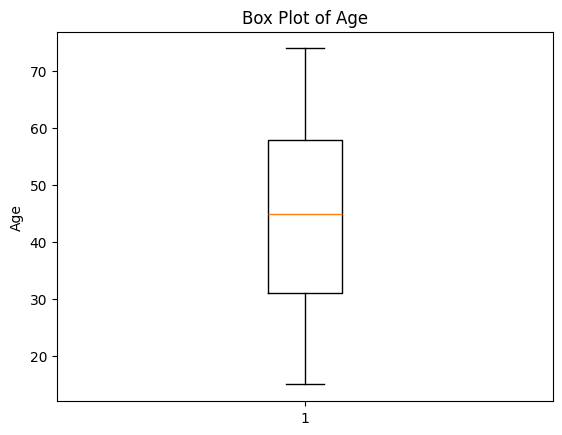

In [224]:
# Box Plot of Age
plt.boxplot(Age)
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()

# Frequency Table of Age

In [225]:
Frequency = pd.Series(Age).value_counts()
Frequency

Age
47    8
23    7
28    7
49    7
32    6
39    6
50    5
60    5
22    5
37    5
58    5
43    4
41    4
57    4
65    4
61    4
74    4
45    4
56    4
24    4
26    4
67    4
68    4
31    4
34    4
51    4
42    4
20    4
72    4
36    4
69    3
18    3
16    3
35    3
59    3
64    3
53    3
38    3
70    3
15    3
40    3
55    2
52    2
48    2
29    2
73    2
46    2
66    2
62    2
19    2
63    1
33    1
17    1
54    1
30    1
21    1
25    1
Name: count, dtype: int64

# Calculate frequency table as well for age column. Ranges for this can be in multiple of 10, e.g. 10-20,20-30,etc..

In [226]:
age_bins = pd.cut(dataset['Age'], bins=range(10, 81, 10), right=False)
age_frequency = age_bins.value_counts().sort_index()

print(age_frequency)

Age
[10, 20)    12
[20, 30)    35
[30, 40)    37
[40, 50)    38
[50, 60)    33
[60, 70)    32
[70, 80)    13
Name: count, dtype: int64


# EDA

In [227]:
# 1. What is a Gender distribution of data?
gender_frequency = dataset["Sex"].value_counts()
gender_frequency

Sex
M    104
F     96
Name: count, dtype: int64

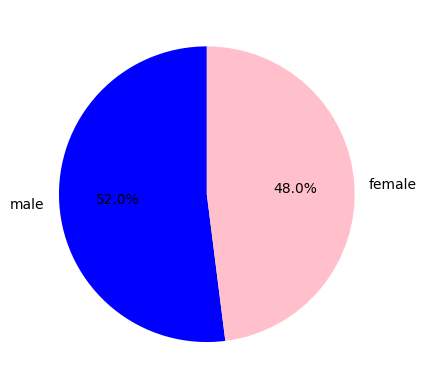

In [228]:
# plot of Gender distribution
plt.pie(
    gender_frequency,
    labels=["male", "female"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["blue", "pink"],
)
plt.show()

In [229]:
# 2. What percent of total population have high cholesterol & high BP?
high_chol_bp = dataset[(dataset["Cholesterol"] == "HIGH") & (dataset["BP"] == "HIGH")].shape[0]
total = dataset.shape[0]
percentage_high_chol_bp = (high_chol_bp / total)*100
percentage_high_chol_bp

17.5

In [230]:
# 3. What are the unique values of Drugs given in data? (df["Drug"].unique)
unique_drugs = dataset["Drug"].unique()
unique_drugs

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [231]:
# 4. How many people have high cholesterol before age of 30?
high_chol_before_30 = dataset[(dataset["Cholesterol"] == "HIGH") & (dataset["Age"] < 30)].shape[0]
high_chol_before_30

26

# Mobile Device Usage and User Behavior Dataset EDA

In [232]:
data = pd.read_csv("user_behavior_dataset.csv")

In [233]:
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [234]:
# 1. Find out the outliers in each numerical column
numerical_columns = data.select_dtypes(include=[np.number]).columns

outliers = {}
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
for i in outliers:
    print(i, ":", outliers[i].shape[0])

User ID : 0
App Usage Time (min/day) : 0
Screen On Time (hours/day) : 0
Battery Drain (mAh/day) : 0
Number of Apps Installed : 0
Data Usage (MB/day) : 0
Age : 0
User Behavior Class : 0


Gender
Male      364
Female    336
Name: count, dtype: int64


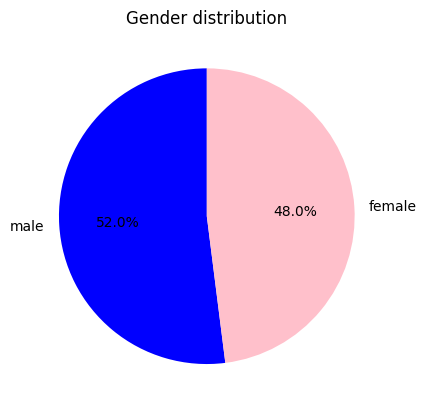

In [235]:
# 2. Find out gender distribution in this data.
gender_distribution = data["Gender"].value_counts()
print(gender_distribution)
plt.pie(
    gender_distribution,
    labels=["male", "female"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["blue", "pink"],
)
plt.title("Gender distribution")
plt.show()

In [236]:
# 3. What is average daily usage of data? Explore gender wise and device wise variation in average usage of data.
AverageDataUsage = data.groupby(["Gender", "Device Model"])[
    "Data Usage (MB/day)"
].mean()
AverageDataUsage

Gender  Device Model      
Female  Google Pixel 5        834.101449
        OnePlus 9             862.377049
        Samsung Galaxy S21    992.888889
        Xiaomi Mi 11          917.858974
        iPhone 12             970.878378
Male    Google Pixel 5        957.821918
        OnePlus 9             952.416667
        Samsung Galaxy S21    890.164557
        Xiaomi Mi 11          965.750000
        iPhone 12             959.986111
Name: Data Usage (MB/day), dtype: float64

In [237]:
# 4. Which device have highest popularity based on Age and Gender?
popular_device = (
    data.groupby(["Device Model", "Gender"])["Age"].count().unstack().fillna(0)
)
popular_device

Gender,Female,Male
Device Model,,
Google Pixel 5,69,73
OnePlus 9,61,72
Samsung Galaxy S21,54,79
Xiaomi Mi 11,78,68
iPhone 12,74,72
